# Interactive Plots and Diagrams

In [1]:
using Reactive, Interact

Interactive plotting can be useful and fun. Here we have a few examples to get you started creating your own interactive plots. We will extensively use the `@manipulate` macro from the [introductory notebook](Introduction.ipynb).

## Compose

[Compose](http://composejl.org) is an excellent tool for creating declarative vector graphics. Here is an example compose diagram you can play around with.

Options{:ToggleButtons,ASCIIAbstractString}([Input{ASCIIAbstractString}] yellow,"color","yellow","yellow",["yellow"=>"yellow","cyan"=>"cyan","tomato"=>"tomato"])

Slider{Float64}([Input{Float64}] 3.1,"rotate",3.1,0.0:0.05:6.25)

Slider{Int64}([Input{Int64}] 11,"n",11,3:20)

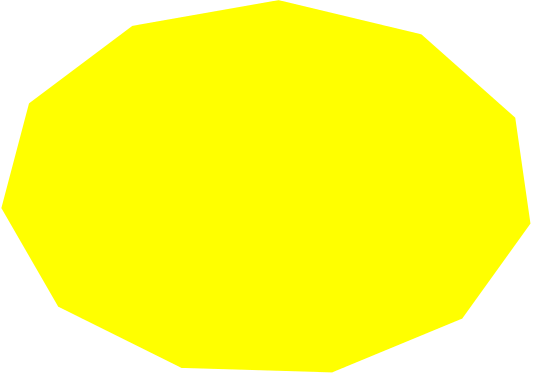

In [2]:
using Color
using Compose

@manipulate for color=["yellow", "cyan", "tomato"], rotate=0:.05:2π, n=3:20
    compose(context(), fill(color),
    polygon([((1+sin(θ+rotate))/2, (1+cos(θ+rotate))/2) for θ in 0:2π/n:2π]))
end

## Gadfly

In [3]:
using Gadfly

Slider{Float64}([Input{Float64}] 6.283185307179586,"\u3d5",6.283185307179586,0.0:0.19634954084936207:12.566370614359172)

Options{:ToggleButtons,Function}([Input{Function}] sin,"f",sin,"sin",["sin"=>sin,"cos"=>cos])

Checkbox([Input{Bool}] false,"both",false)

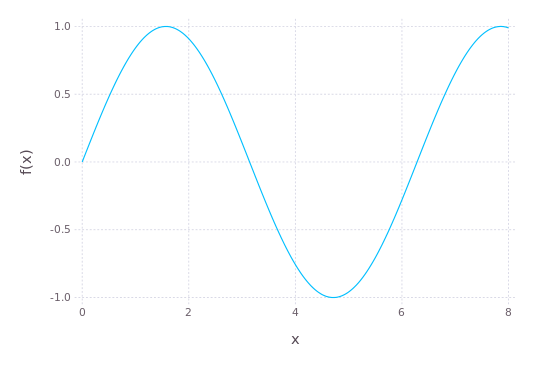

In [4]:
@manipulate for ϕ = 0:π/16:4π, f = [:sin => sin, :cos => cos], both = false
    if both
        plot([θ -> sin(θ + ϕ), θ -> cos(θ + ϕ)], 0, 8)
    else
        plot(θ -> f(θ + ϕ), 0, 8)
    end
end

Slider{Int64}([Input{Int64}] 13,"n",13,1:25)

Options{:ToggleButtons,DataType}([Input{DataType}] LineGeometry,"g",LineGeometry,"LineGeometry",["LineGeometry"=>LineGeometry,"PointGeometry"=>PointGeometry])

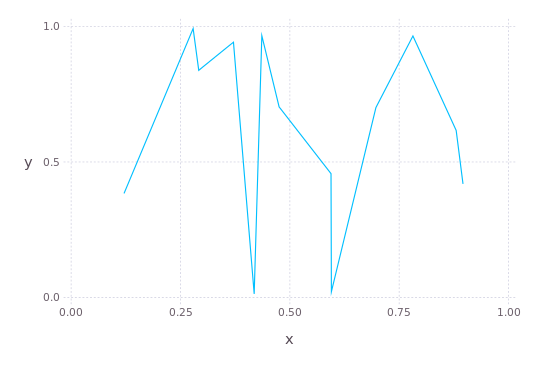

In [5]:
@manipulate for n=1:25, g = [Geom.line, Geom.point]
    Gadfly.plot(y=rand(n), x=rand(n), g)
end

## PyPlot

In [6]:
using PyPlot

INFO: Loading help data...


Since PyPlot API has functions with side effects, you want to create a figure first and use it in each iteration of `@manipulate` with `withfig`. Notice `f = figure()` and `withfig(f)` in the example below. The rest of it is straightforward.

Slider{Float64}([Input{Float64}] 2.0,"\u3b1",2.0,1.0:0.1:3.0)

Slider{Float64}([Input{Float64}] 2.0,"\u3b2",2.0,1.0:0.1:3.0)

Slider{Float64}([Input{Float64}] 2.0,"\u3b3",2.0,1.0:0.1:3.0)

Textbox{ASCIIAbstractString}([Input{ASCIIAbstractString}] a funny plot,"leg",nothing,"a funny plot")

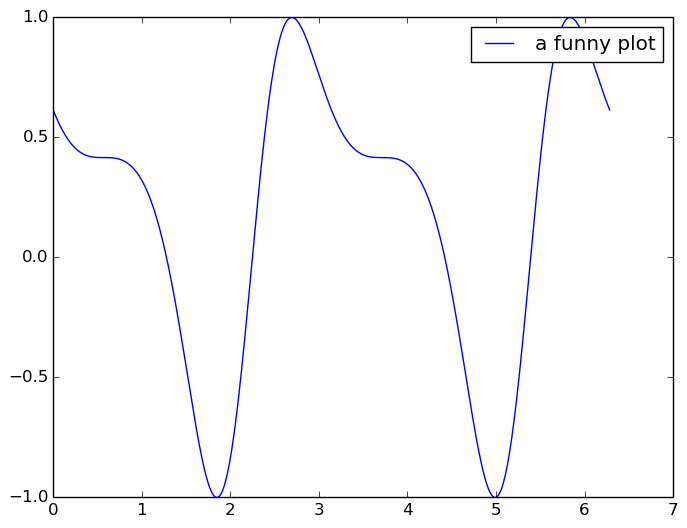

In [7]:
f = figure()
x = linspace(0,2π,1000)
@manipulate for α=1:0.1:3, β=1:0.1:3, γ=1:0.1:3, leg="a funny plot"; withfig(f) do
        PyPlot.plot(x, cos(α*x + sin(β*x + γ)))
        legend([leg])
    end
end

As an added bonus, you can even fire up a Python GUI with `pygui(true)` and be able to use the widgets above to update the plot.